In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-classification/validation/validation/travel and adventure/20.jpg
/kaggle/input/image-classification/validation/validation/architecture/80px-Cathedral_Flying_Buttresses.jpg
/kaggle/input/image-classification/validation/validation/art and culture/3 18.59.20.jpg
/kaggle/input/image-classification/validation/validation/food/0c0STZW4GMiiud6o87w4.jpg
/kaggle/input/image-classification/images/images/food and d rinks/WuYczDpWqZBLFiSFvEpX.jpg
/kaggle/input/image-classification/images/images/travel and  adventure/Places365_val_00011185.jpg
/kaggle/input/image-classification/images/images/art and culture/534 (7).jpg
/kaggle/input/image-classification/images/images/architecure/6358283755_53317486ed_n.jpg
/kaggle/input/image-classification/test/test/classify/6.JPG


In [2]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

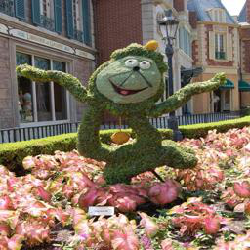

In [3]:
load_img('/kaggle/input/image-classification/images/images/travel and  adventure/Places365_val_00011185.jpg',target_size=(250,250))

In [4]:
train_gen= ImageDataGenerator(rescale=1./255,validation_split=0.3)

train_data=train_gen.flow_from_directory('/kaggle/input/image-classification/images/images',target_size=(50,50),batch_size=32,class_mode='categorical',shuffle=True)

Found 35093 images belonging to 4 classes.


In [5]:
test =train_gen.flow_from_directory('/kaggle/input/image-classification/validation/validation',target_size=(50,50),batch_size=1,shuffle=False)

Found 122 images belonging to 4 classes.


In [6]:
train_data.class_indices


{'architecure': 0,
 'art and culture': 1,
 'food and d rinks': 2,
 'travel and  adventure': 3}

In [7]:
train_data.classes


array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [8]:
Base_model=VGG16(input_shape=[50,50,3],weights='imagenet',include_top=False)


2022-04-28 07:05:47.972870: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


58900480/58889256 [==============================] - 0s 0us/step


In [9]:
Base_model.trainable=True
# pred_layer =Dense
layer=10
for i in Base_model.layers[:layer]:
    Base_model.trainable=False
pool = GlobalAveragePooling2D()
mid_layer=Dense(100,activation='softmax')
final_layer =Dense(4,activation='softmax')
model = Sequential([Base_model,pool,mid_layer,final_layer])

model.summary()
Base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 14,766,392
Trainable params: 51,704
Non-trainable params: 14,714,688
_________________________________________________________________
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
________________________

In [10]:
Base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 14,766,392
Trainable params: 51,704
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics='accuracy')


In [13]:
model.fit(train_data,validation_data=test,epochs=1)


2022-04-28 07:05:49.883544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


  38/1097 [>.............................] - ETA: 10:13 - loss: 1.3744 - accuracy: 0.3832

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 878/1097 [=======================>......] - ETA: 2:02 - loss: 1.0599 - accuracy: 0.6281

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1097/1097 [==============================] - 622s 565ms/step - loss: 1.0181 - accuracy: 0.6444 - val_loss: 0.8576 - val_accuracy: 0.6967


In [14]:
pred=model.predict(test).argmax(axis=1)   
pred

array([3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 3, 1, 2, 1, 0, 2, 3, 1, 0, 1, 3, 2,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2, 0, 2, 0, 1,
       2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 0, 3])

# Resnet 50

In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

base_model=ResNet50(input_shape=[64,64,3],weights='imagenet',include_top=False)
base_model.trainable=False   # trainable is false bcoz we are training ony the classifiers.
pool=GlobalAveragePooling2D()
mid_layer=Dense(100,activation='relu')
fin=Dense(4,activation='softmax')
model1=Sequential([
    base_model,
    pool,Dropout(0.2),
    mid_layer,
    Dropout(0.2),
    BatchNormalization(),
    fin])

94781440/94765736 [==============================] - 1s 0us/step


In [16]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               204900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [18]:
model1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics='accuracy')


In [19]:
model1.fit(train_data,validation_data=test,epochs=1)


1097/1097 [==============================] - 461s 416ms/step - loss: 1.3091 - accuracy: 0.3941 - val_loss: 1.3807 - val_accuracy: 0.2951


In [20]:
pred1=model1.predict(test).argmax(axis=1)   
pred1

array([3, 3, 3, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2,
       3, 0, 2, 0, 0, 0, 1, 1, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 3, 0,
       1, 0, 1, 2, 3, 0, 3, 0, 3, 3, 0, 0, 0, 1, 0, 2, 3, 2, 3, 1, 3, 1,
       1, 1, 2, 0, 3, 3, 1, 0, 2, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 2, 1,
       3, 3, 2, 1, 0, 1, 3, 3, 0, 3, 3, 3])